# Wiskunde aan het werk: een simulatie-gebaseerde aanpak

### Ziekteverspreiding

#### Inladen nodige pakketten

In [4]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

## SIR-model

#### Implementatie van de modelvergelijkingen (cfr. Opdracht 2.1.4)

In [12]:
def SIR(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((2))
	S = INP[0]
	I = INP[1]
	Y[0] = - beta * S * I
	Y[1] = beta * S * I - gamma * I
	return Y  

#### Definitie modelparameters en initiële conditie

In [13]:
beta=0.25
gamma=0.1
maxT=150
I0=0.01
S0=1-I0

####  Oplossing stelsel differentiaalvergelijkingen

In [14]:
t_start = 0.0; t_end = maxT; t_inc = 1.0
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES_SIR = spi.odeint(SIR,(S0, I0),t_range)

#### Plotten van de oplossingen

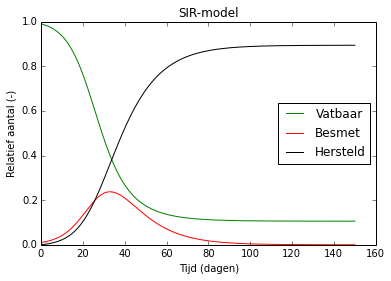

In [15]:
pl.plot(RES_SIR[:,0], '-g', label='Vatbaar')
pl.plot(RES_SIR[:,1], '-r', label='Besmet')
pl.plot(1-RES_SIR[:,0]-RES_SIR[:,1], '-k', label='Hersteld')
pl.legend(loc=0)
pl.title('SIR-model')
pl.xlabel('Tijd (dagen)')
pl.ylabel('Relatief aantal (-)')
pl.show()

#### Simulatieresultaten op dag T

In [59]:
T=21
RES_SIR[T+1,:]

array([ 0.71115611,  0.15651869])

## SIR-model met vaccinaties

#### Implementatie van de modelvergelijkingen (cfr. Opdracht 2.3.2)

In [16]:
def SIRV(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((2))
	S = INP[0]
	I = INP[1]
	Y[0] = - beta *S * I - alpha*S
	Y[1] = beta * S * I - gamma * I
	return Y  

#### Definitie modelparameters en initiële conditie

In [17]:
beta=0.25
gamma=0.1
alpha=0.01
maxT=150
I0=0.01
S0=1-I0

####  Oplossing stelsel differentiaalvergelijkingen

In [18]:
t_start = 0.0; t_end = maxT; t_inc = 1.0
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES_SIRV = spi.odeint(SIRV,(S0, I0),t_range)

#### Plotten van de oplossingen

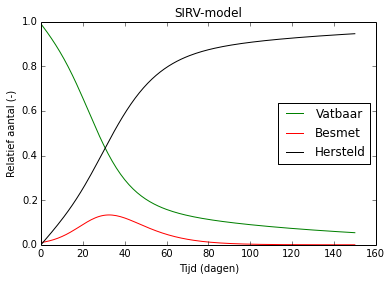

In [19]:
pl.plot(RES_SIRV[:,0], '-g', label='Vatbaar')
pl.plot(RES_SIRV[:,1], '-r', label='Besmet')
pl.plot(1-RES_SIRV[:,0]-RES_SIRV[:,1], '-k', label='Hersteld')
pl.legend(loc=0)
pl.title('SIRV-model')
pl.xlabel('Tijd (dagen)')
pl.ylabel('Relatief aantal (-)')
pl.show()

#### Simulatieresultaten op dag T

In [58]:
T=21
RES_SIRV[T+1,:]

array([ 0.61456861,  0.10187225])

## SEIR-model

#### Implementatie van de modelvergelijkingen (cfr. Opdracht 2.4.2)

In [20]:
def SEIR(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	S = INP[0]
	E = INP[1]
	I = INP[2]
	Y[0] = - beta * S * I - alpha*S
	Y[1] =  beta * S * I - kappa*E
	Y[2] = kappa*E - gamma * I
	return Y  

#### Definitie modelparameters en initiële conditie

In [21]:
beta=0.25
gamma=0.1
alpha=0.01
kappa=0.5
maxT=150
E0=0.01
S0=1-E0
I0=0

####  Oplossing stelsel differentiaalvergelijkingen

In [22]:
t_start = 0.0; t_end = maxT; t_inc = 1.0
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES_SEIR = spi.odeint(SEIR,(S0, E0, I0),t_range)

#### Plotten van de oplossingen

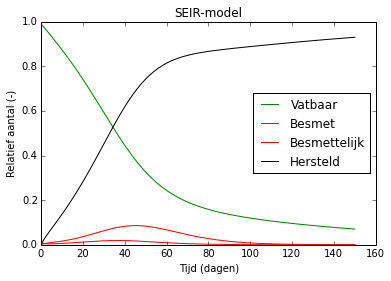

In [23]:
pl.plot(RES_SEIR[:,0], '-g', label='Vatbaar')
pl.plot(RES_SEIR[:,1], '-r', label='Besmet')
pl.plot(RES_SEIR[:,2], '-r', label='Besmettelijk')
pl.plot(1-RES_SEIR[:,0]-RES_SEIR[:,1]--RES_SEIR[:,2], '-k', label='Hersteld')
pl.legend(loc=0)
pl.title('SEIR-model')
pl.xlabel('Tijd (dagen)')
pl.ylabel('Relatief aantal (-)')
pl.show()

#### Simulatieresultaten op dag T

In [58]:
T=21
RES_SEIR[T+1,:]

array([ 0.61456861,  0.10187225])